# Project final (Ivan & Bertrand)

## Analyse exploratoire des Données 

### Chargement du dataset:

In [1]:
import pandas as pd
df_icu = pd.read_csv('data01.csv')
df_icu.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


### Identification de chaque type de variable:

In [2]:
df_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

### Nombre de valeurs manquantes par colonne

In [4]:
df_icu.isna().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Valeurs Aberrantes par colonne

In [5]:
Q1 = df_icu.quantile(0.25)
Q3 = df_icu.quantile(0.75)
IQR = Q3 - Q1

# ((nbaDF < (Q1 - 1.5 * IQR)) | (nbaDF > (Q3 + 1.5 * IQR))).sum()
print("En dessous de 1,5 * distance interquartile")
print((df_icu < (Q1 - 1.5 * IQR)).sum())
print("\nAu-dessus de 1,5 * distance interquartile")
print((df_icu > (Q3 + 1.5 * IQR)).sum())

En dessous de 1,5 * distance interquartile
group                        0
ID                           0
outcome                      0
age                          5
gendera                      0
BMI                          0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                   1
Systolic blood pressure      0
Diastolic blood pressure     2
Respiratory rate             0
temperature                  7
SP O2                       17
Urine output                 0
hematocrit                   0
RBC                          0
MCH                         41
MCHC                        13
MCV                         23
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                

In [6]:
import seaborn as sns
from seaborn import set_theme
import matplotlib as plt

array([[<AxesSubplot:title={'center':'group'}>,
        <AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'outcome'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gendera'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'hypertensive'}>],
       [<AxesSubplot:title={'center':'atrialfibrillation'}>,
        <AxesSubplot:title={'center':'CHD with no MI'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'deficiencyanemias'}>,
        <AxesSubplot:title={'center':'depression'}>,
        <AxesSubplot:title={'center':'Hyperlipemia'}>,
        <AxesSubplot:title={'center':'Renal failure'}>],
       [<AxesSubplot:title={'center':'COPD'}>,
        <AxesSubplot:title={'center':'heart rate'}>,
        <AxesSubplot:title={'center':'Systolic blood pressure'}>,
        <AxesSubplot:title={'center':'Diastolic blood pressure'}>,
        <AxesSubplot:title={'cen

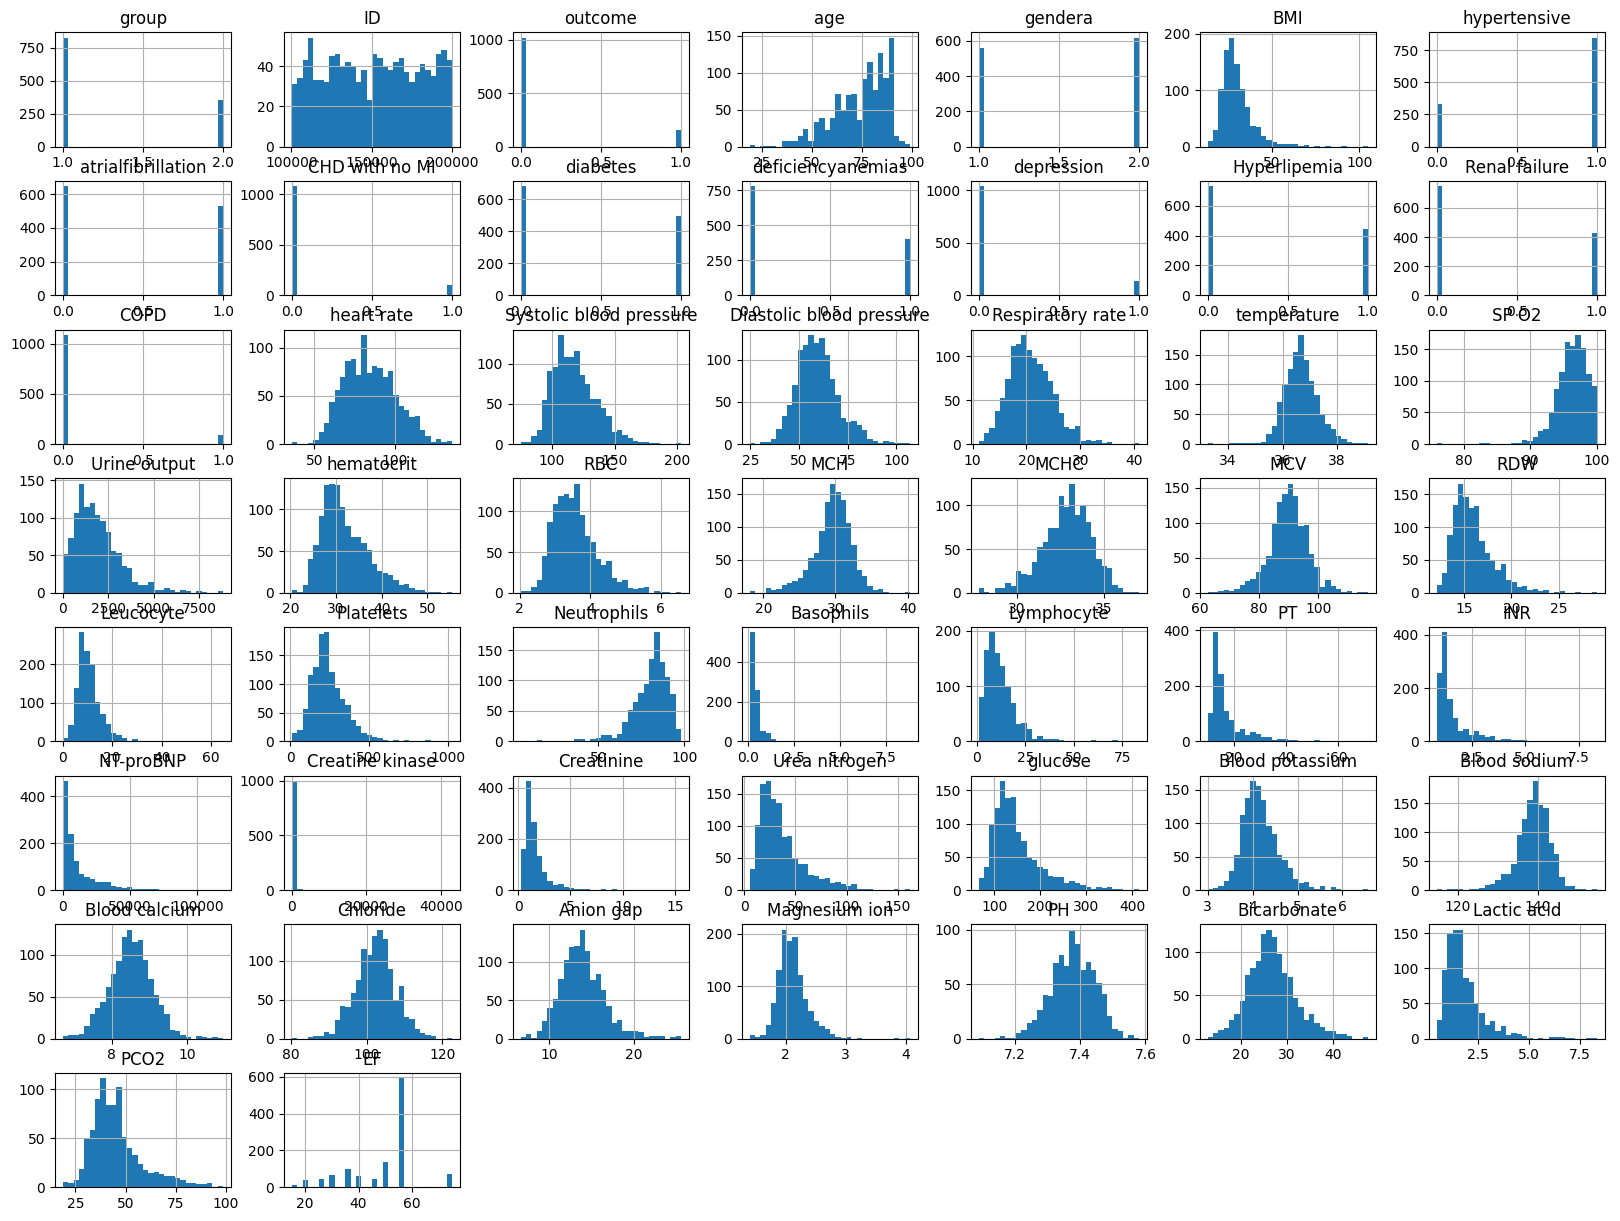

In [11]:
df_icu.hist(bins=30, figsize=(20, 15))

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#optional for correlation
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
#optionlal for correlation
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df_icu, diag_kind = 'kde', kind = 'reg',\
                diag_kws={'color' :'orange'},\
                plot_kws={'color' : 'red', 'scatter_kws' : {'color':'blue'}})
#optional for orrelation
g.map_lower(corrfunc)
plt.show()